# Face Detection using Viola-Jones Algorithm

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
print ("Modules imported")

Modules imported


In [2]:
img_raw= cv2.imread('Lena.jpg')

In [3]:
print(type(img_raw))
img_raw.shape
#img = cv2.resize(img_raw,(568,892))

<class 'numpy.ndarray'>


(822, 1200, 3)

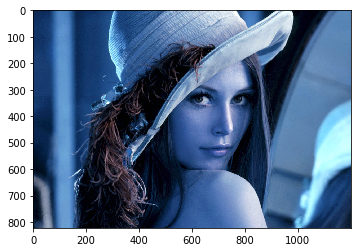

In [4]:
plt.imshow(img_raw)
# the image is bluish because while opencv uses BGR , matplotlib uses RGB color scheme

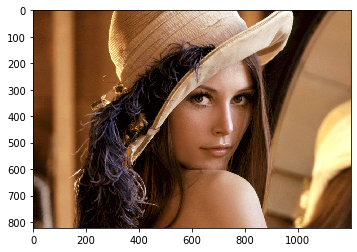

In [5]:
# To avoid this issue, we will transform the channel to how matplotlib expects it to be using the cvtColor function.

img = cv2.cvtColor(img_raw, cv2.COLOR_BGR2RGB)
plt.imshow(img)

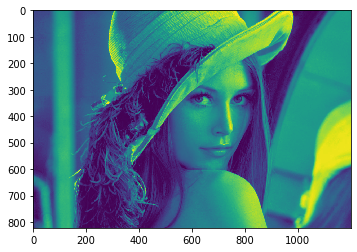

In [6]:
#Turn image to black and white
im_gray = cv2.imread('Lena.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(im_gray)

In [7]:
#Save image in working directory
cv2.imwrite('LH_black_and_white.jpg',im_gray)

True

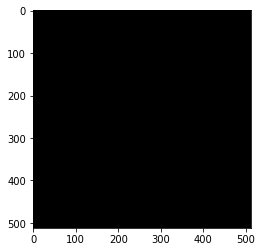

In [9]:
#create a blank image

image_blank = np.zeros(shape=(512,512,3), dtype = np.int16)
plt.imshow(image_blank)

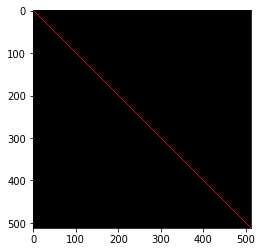

In [10]:
#Draw a red line diagonally
line_red = cv2.line(image_blank,(0,0),(511,511),(255,0,0),1)
plt.imshow(line_red)

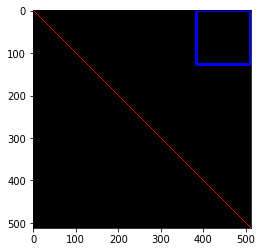

In [11]:
#draw a  blue rectangle
rectangle= cv2.rectangle(image_blank,(384,0),(510,128),(0,0,255),5)
plt.imshow(rectangle)

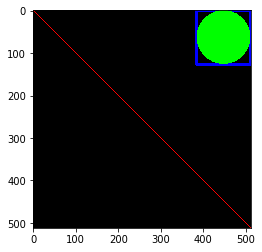

In [12]:
#Draw a filled green circle. 
cv2.circle(image_blank,(447,63), 63, (0,255,0), -1) # -1 corresponds to a filled circle
plt.imshow(image_blank)

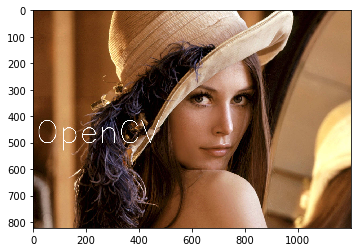

In [13]:
font = cv2.FONT_HERSHEY_SIMPLEX
text = cv2.putText(img,'OpenCV',(10,500), font, 4,(255,255,255),2,cv2.LINE_AA)
plt.imshow(text)

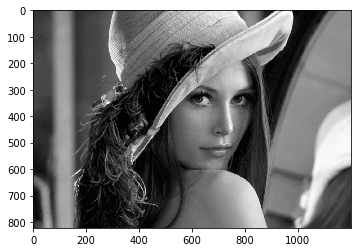

In [19]:
test_image1 = cv2.imread('Lena.jpg')

#Converting to grayscale
test_image_gray1 = cv2.cvtColor(test_image1, cv2.COLOR_BGR2GRAY)

# Displaying the grayscale image
plt.imshow(test_image_gray1, cmap='gray')

In [16]:
def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [17]:
 haar_cascade_face = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

Faces found:  1


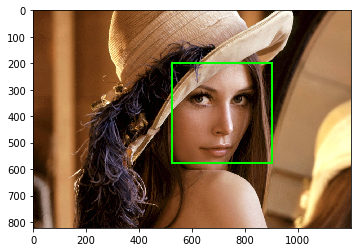

In [20]:
faces_rects = haar_cascade_face.detectMultiScale(test_image_gray1, scaleFactor = 1.2, minNeighbors = 8);

# Let us print the no. of faces found
print('Faces found: ', len(faces_rects))

for (x,y,w,h) in faces_rects:
     cv2.rectangle(test_image1, (x, y), (x+w, y+h), (0, 255, 0), 5)
        
#convert image to RGB and show image

plt.imshow(convertToRGB(test_image1))

In [21]:
def detect_faces(cascade, test_image, scaleFactor = 1.1):
    # create a copy of the image to prevent any changes to the original one.
    image_copy = test_image.copy()

    #convert the test image to gray scale as opencv face detector expects gray images
    gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)

    # Applying the haar classifier to detect faces
    faces_rect = cascade.detectMultiScale(gray_image, scaleFactor=scaleFactor, minNeighbors=5)

    for (x, y, w, h) in faces_rect:
        cv2.rectangle(image_copy, (x, y), (x+w, y+h), (0, 255, 0), 15)

    return image_copy

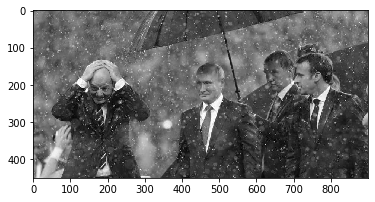

In [23]:
#loading image
test_image2 = cv2.imread('rainy_faces.jpg')

# Converting to grayscale
test_image_gray2 = cv2.cvtColor(test_image2, cv2.COLOR_BGR2GRAY)

# Displaying grayscale image
plt.imshow(test_image_gray2, cmap='gray')

In [24]:
#call the function to detect faces
faces = detect_faces(cascade, test_image2)

#convert to RGB and display image
plt.imshow(convertToRGB(faces))

NameError: name 'cascade' is not defined